Purpose:
- build the cell-cell graph
- embed cells in 2D (UMAP)
- identify clusters (Leiden)
- Save a resusable, clustered object

Load data & Libraries

In [ ]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\processed\figshare\adata_pca.h5ad")

Sanity check

In [5]:
adata

AnnData object with n_obs × n_vars = 178971 × 3000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Percent_mt', 'Patient', 'Gender', 'Subtype', 'Stage', 'seurat_clusters', 'Study', 'Cell_Cluster_level1', 'Cell_Cluster_level2', 'validation_original_annotation', 'id', 'predicted.celltypel1.score', 'predicted.celltypel1', 'predicted.celltypel2.score', 'predicted.celltypel2'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'X_name', 'hvg', 'log1p', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

Construct the neighborhood graph
**Conceptually**
- each cell becomes a node
- edges connect transcriptionally similar cells
- UMAP and clustering are both derived from this graph

In [6]:
sc.pp.neighbors(
    adata,
    n_neighbors=15,
    n_pcs=25
)

c:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


n_neighbors=15:
- local neighborhood size
- controls how 'local' structure is perserved
n_pcs=25:
- Uses the first 25 PCs
- Filters noise before graph construction

Compute UMAP embedding
**UMAP**
- perserves local neighborhoods
- projects high-dimensional graph -> 2D
- visualization only (not used for clustering)

In [7]:
sc.tl.umap(adata)

Initial UMAP visualization
- see overall structure
- identify obvious batch effects
- check if data looks biologically plausible

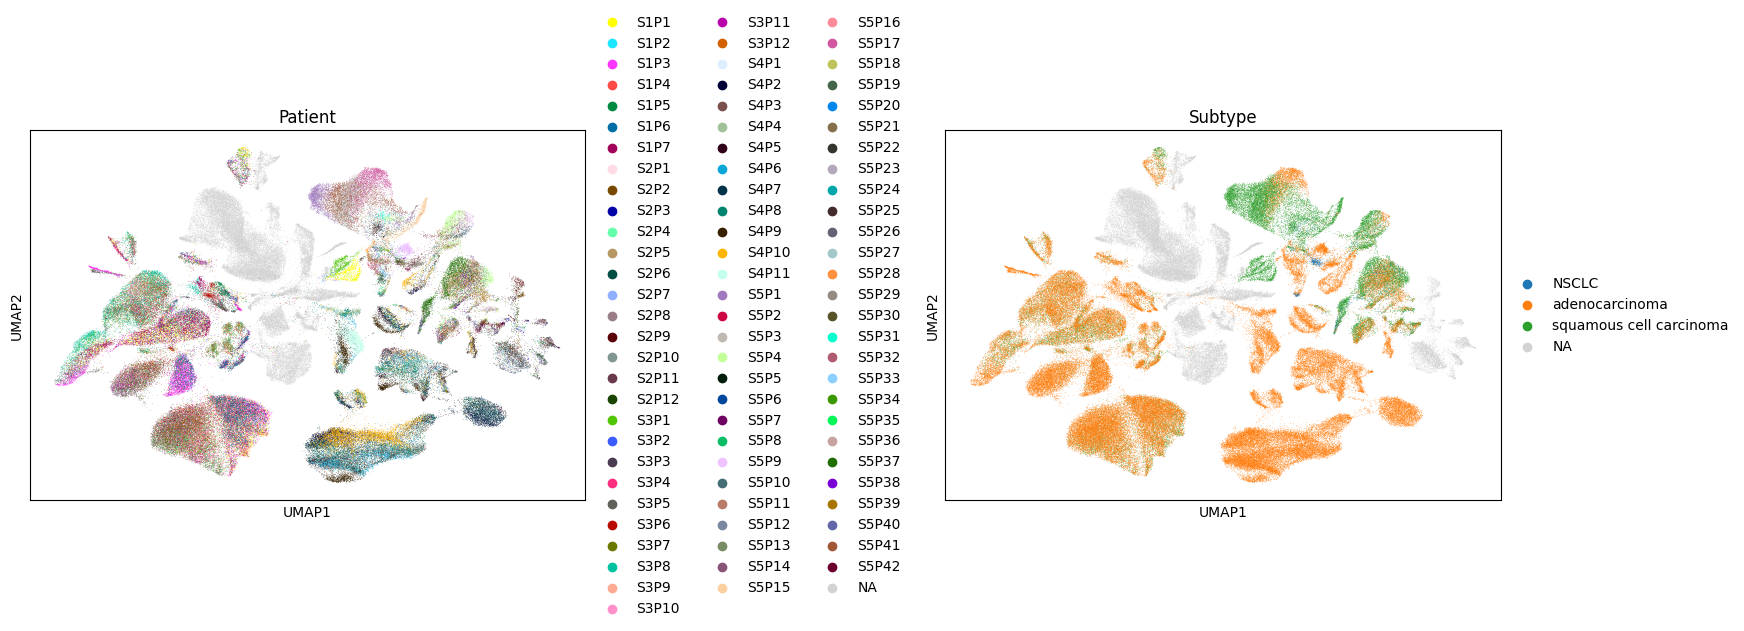

In [11]:
sc.pl.umap(
    adata,
    color=["Patient", "Subtype"],
    wspace=0.5,
)

## Analysis
- Subtype plot shows distinct clusters for adenocarcinoma and squamous cell carcinoma, indicating significantly different gene expression profiles
- Patient plot has many clusters dominated by a single color, suggesting a strong batch effect

Clustering with Leiden
### Leiden clustering:
- operates on the neighborhood graph
- finds communities of similar cells
- resolution controls granularity

In [13]:
sc.tl.leiden(
    adata,
    resolution=0.6,
    key_added="leiden_r0.6"
)

C:\Users\jtspy\AppData\Local\Temp\ipykernel_34100\2674207107.py:1: FutureWarning: The `igraph` implementation of leiden clustering is *orders of magnitude faster*. Set the flavor argument to (and install if needed) 'igraph' to use it.
In the future, the default backend for leiden will be igraph instead of leidenalg. To achieve the future defaults please pass: `flavor='igraph'` and `n_iterations=2`. `directed` must also be `False` to work with igraph’s implementation.
  sc.tl.leiden(


Visualize clusters

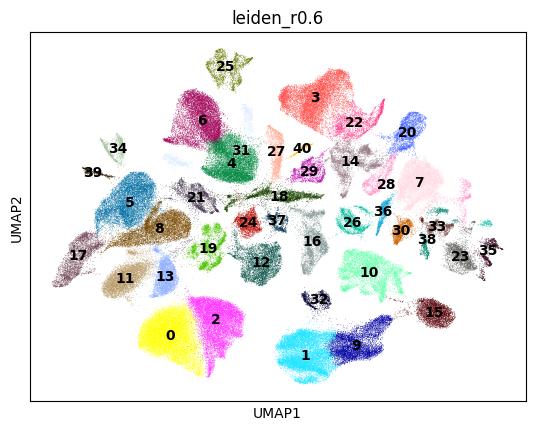

In [15]:
sc.pl.umap(
    adata,
    color="leiden_r0.6",
    legend_loc="on data"
)

Exploring Clustering resolution

C:\Users\jtspy\AppData\Local\Temp\ipykernel_34100\2603719844.py:2: FutureWarning: The `igraph` implementation of leiden clustering is *orders of magnitude faster*. Set the flavor argument to (and install if needed) 'igraph' to use it.
In the future, the default backend for leiden will be igraph instead of leidenalg. To achieve the future defaults please pass: `flavor='igraph'` and `n_iterations=2`. `directed` must also be `False` to work with igraph’s implementation.
  sc.tl.leiden(adata, resolution=res, key_added=f"leiden_r{res}")
C:\Users\jtspy\AppData\Local\Temp\ipykernel_34100\2603719844.py:2: FutureWarning: The `igraph` implementation of leiden clustering is *orders of magnitude faster*. Set the flavor argument to (and install if needed) 'igraph' to use it.
In the future, the default backend for leiden will be igraph instead of leidenalg. To achieve the future defaults please pass: `flavor='igraph'` and `n_iterations=2`. `directed` must also be `False` to work with igraph’s implem

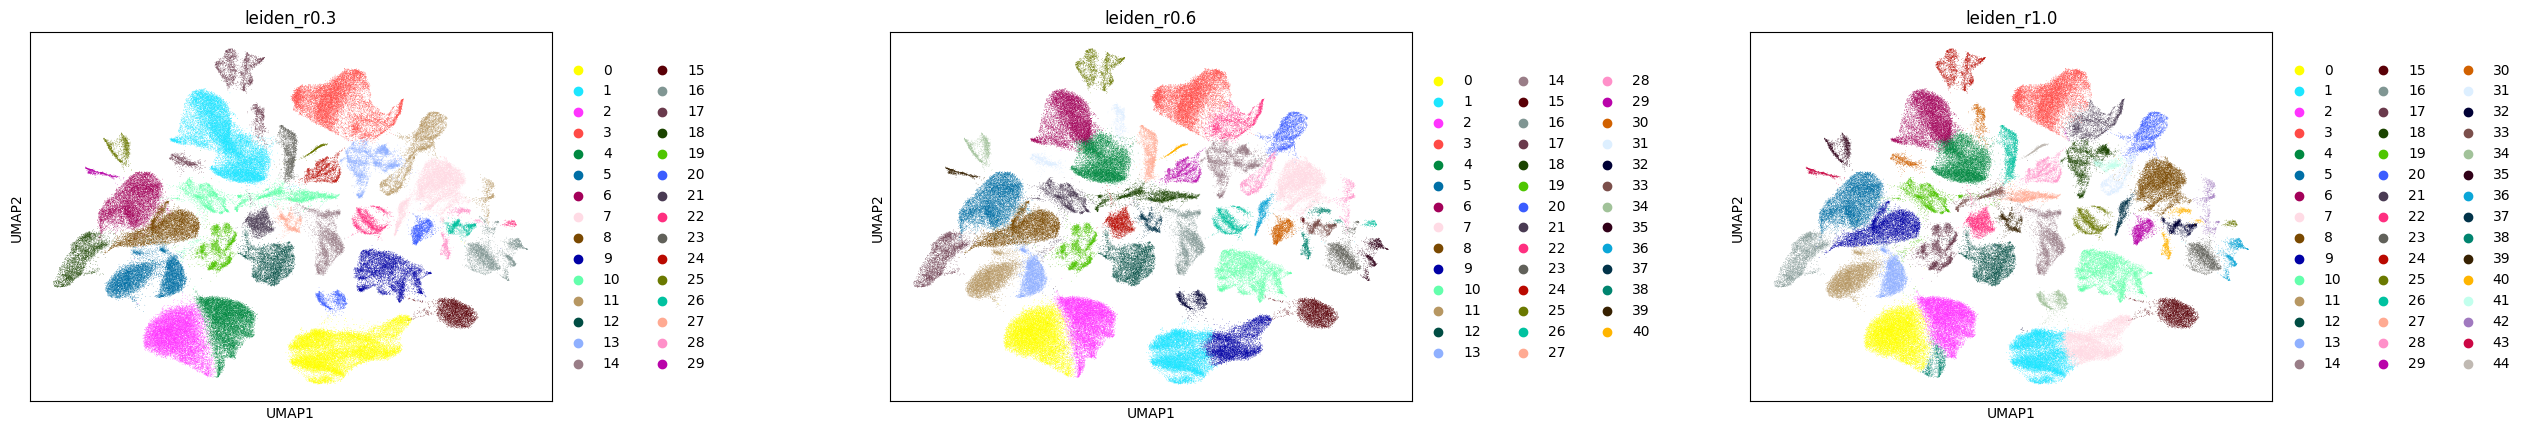

In [16]:
for res in [0.3, 0.6, 1.0]:
    sc.tl.leiden(adata, resolution=res, key_added=f"leiden_r{res}")

sc.pl.umap(
    adata,
    color=["leiden_r0.3", "leiden_r0.6", "leiden_r1.0"],
    wspace=0.5,
)

In [17]:
adata.write(r"C:\Users\jtspy\OneDrive\Desktop\PersonalProject\NSCLC_Project\NSCLC-scRNA-Analysis\data\processed\adata_umap_clusters.h5ad")